**Equipo:**

Kevin Majim Ortega(C-312)

Jan Carlos Pérez(C-312)

**Breve introducción del algoritmo utlizado:**

La función minimize de scipy.optimize es una función de optimización que se usa para encontrar el mínimo valor de una función objetivo. La función minimize es una herramienta muy útil para la optimización de funciones de cualquier tipo, incluidas las funciones con restricciones. Los métodos más utlizados son en este trabajo son los de la clase Newton, QuasiNewton, en su modalidad BFGS, el cual es un método de optimización de segundo orden(utliliza la segunda derivada). Este método BFGS es más estable que el método de Newton y converge más rápido cuando la función es no lineal o tiene múltiples soluciones. Es favorable utilizar BFGS cuando se tiene una buena aproximación de la función inicial y aproximaciones de la matriz hessiana que pueden volverse costosas computacionalmente en espacions de alta dimensión.


**Algoritmo BFGS:**

El método BFGS es una solución que se utiliza a menudo cuando se desea un algoritmo con direcciones de descenso .

La idea principal de este método es evitar la construcción explícita de la matriz hessiana y, en cambio, construir una aproximación de la inversa de la segunda derivada de la función a minimizar, analizando los diferentes gradientes sucesivos. Esta aproximación de las derivadas de la función conduce a un método cuasi-Newton (una variante del método de Newton ) para encontrar el mínimo en el espacio de parámetros.

**Algoritmo de Newton:**

El algoritmo de Newton es un algoritmo iterativo que se utiliza para encontrar el mínimo de una función. El algoritmo comienza con una aproximación inicial a la solución y luego utiliza la derivada de la función para calcular una nueva aproximación. Este proceso se repite hasta que se alcanza una solución que satisfaga la tolerancia especificada. El algoritmo de Newton es un algoritmo muy eficiente y es capaz de encontrar el mínimo de funciones muy complejas. Sin embargo, el algoritmo de Newton puede ser inestable si la función es muy plana o si tiene múltiples mínimos locales.


**Algoritmo de Región de Confianza:**

Un algoritmo de región de confianza es un método de optimización que se utiliza para encontrar el mínimo o máximo de una función objetivo sujeta a restricciones. Este tipo de algortimo se basa en la idea de dividir el espacio de búsqueda en regiones de confianza, donde se considera que el modelo es válido y se puede realizar una aproximación confiable de la función objetivo.

En cada iteración, el algoritmo de la región de confianza construye un modelo local de la función objetivo dentro de la región de confianza actual. Este modelo se utiliza para determinar la dirección y la distancia en la que se debe mover la solución actual para mejorar la función objetivo. Luego, se evalúa la calidad de la aproximación del modelo y se ajusta el tamaño de la región en función de esta evaluación.

**NOTA:** En los ejercicios 11 y 16 se muestran dos gráficas que representan la convergencia de la minimización, la primera siempre será la que representa la minimzación correcta, la segunda es para hacer notar la efectividad del método escogido en cada caso.

**A continuación se presenta la implementación de los métodos que se utilizaron en Python:**

In [22]:
import numpy as np
from scipy.optimize import minimize
import scipy as sci
import matplotlib.pyplot as plt

bnds=((0,2*np.pi),(0,np.pi))


def optimization_Newton(objetivo_func,x0,derivada_x1,derivada_x2,restricciones,callback):
    return  minimize(objetivo_func, x0, jac=lambda x: np.array([derivada_x1(x),derivada_x2(x)]),bounds=bnds,constraints=restricciones, method='Newton-CG',callback=callback,tol=1e-6)

def optimization_MaxDesc(objetivo_func,x0,derivada_x1,derivada_x2,restricciones,callback):
    return  minimize(objetivo_func, x0, jac=lambda x: np.array([derivada_x1(x),derivada_x2(x)]),constraints=restricciones, method='CG',callback=callback,tol=1e-6)

def optimization_QuasiNewton(objetivo_func,x0,derivada_x1,derivada_x2,restricciones,callback):
    return  minimize(objetivo_func, x0, jac=lambda x: np.array([derivada_x1(x),derivada_x2(x)]),bounds=bnds,constraints=restricciones, method='BFGS',callback=callback,tol=1e-6)

def optimization_ConfidenceLand(objetivo_func,x0,derivada_x1,derivada_x2,restricciones,callback):
    return  minimize(objetivo_func, x0, jac=lambda x: np.array([derivada_x1(x),derivada_x2(x)]),constraints=restricciones, method='trust-constr',callback=callback,tol=1e-6)

def Print_plot(result,Metodo,F):
    iterations=range(1,len(result)+1)
    plt.plot(iterations,result, marker='o', linestyle='-', color='b')
    plt.xlabel('Iteración')
    plt.ylabel('Valor de la función')
    plt.title('Convergencia de la minimización' +' '+ Metodo+' '+F)
    plt.grid(True)
    plt.show()

**Definición en Python de la función F_16(Ejercicio 16)**

In [23]:
import numpy as np
from scipy.optimize import minimize
import sympy as sp
import matplotlib.pyplot as plt

constraints_16=(
    {'type':'ineq','fun':lambda x: x[0]-2*np.pi},
    {'type':'ineq','fun':lambda x: x[1]-2*np.pi},
    {'type':'ineq','fun':lambda x: x[0]+2*np.pi},
    {'type':'ineq','fun':lambda x: x[1]+2*np.pi})

x0_16 = np.array([-2.0,-2.0])

x1_16,x2_16=sp.symbols('x1 x2')
f_16 = sp.sin(x1_16) * sp.exp((1 - sp.cos(x2_16))**2) + sp.cos(x2_16) * sp.exp((1 - sp.sin(x1_16))**2) + (x1_16 - x2_16)**2

diff_x1_16=sp.diff(f_16,x1_16)
diff_x2_16=sp.diff(f_16,x2_16)

f_16=sp.lambdify((x1_16, x2_16),f_16, 'numpy')
diff_x1_16 = sp.lambdify((x1_16, x2_16), diff_x1_16, 'numpy')
diff_x2_16 = sp.lambdify((x1_16, x2_16), diff_x2_16, 'numpy')

Mapped_f_16 = lambda x: f_16(x[0],x[1])
Mapped_diff_x1_16= lambda x: diff_x1_16(x[0],x[1])
Mapped_diff_x2_16= lambda x: diff_x2_16(x[0],x[1])
result_16=[]

**Definición en Python de la función F_11(Ejercicio 11):**

In [24]:
from sympy import symbols, exp, summation
import sympy as sym
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt


x1, x2 = symbols('x1 x2')

t_i=0.1
y_i=exp(-t_i)-5*exp(10*t_i)
f11=(exp(-t_i*x1) - (5*exp(-t_i*x2)) - y_i)**2

for i in range(2,11):
    t_i=0.1*i
    y_i=exp(-t_i)-5*exp(10*t_i)
    f11+=(exp(-t_i*x1) - (5*exp(-t_i*x2)) - y_i)**2
t_i = 0.1 * i
y_i = exp(-t_i) - 5 * exp(10 * t_i)


derivada_x1_sym=sym.diff(f11,x1)
derivada_x2_sym=sym.diff(f11,x2)

f11_num=sym.lambdify((x1,x2),f11,'numpy')
f11_diff_x1=sym.lambdify((x1,x2),derivada_x1_sym,'numpy')
f11_diff_x2=sym.lambdify((x1,x2),derivada_x2_sym,'numpy')

Mapped_f11= lambda x: f11_num(x[0],x[1])
Mapped_f11_diff_x1=lambda x: f11_diff_x1(x[0],x[1])
Mapped_f11_diff_x2=lambda x: f11_diff_x2(x[0],x[1])

x0_11=np.array([3.0,8.0])

constraints_11=( {'type':'ineq','fun':lambda x:-x[0]},
                {'type':'ineq','fun':lambda x:-x[1]},
                {'type':'ineq','fun':lambda x:x[0]-20},
                {'type':'ineq','fun':lambda x:x[1]-20})


result_11=[]



**Definición en Python de la función F_74(Ejercicio 74):**

In [25]:
from sympy import symbols, exp
import sympy as sym
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
from scipy.optimize import minimize

N=[10,100,500,1000]

def Create_values(N,val):
    for i in range(0,N-1):
        x0.append(val)

def Suma(x):
    term=0
    for i in range(0,len(x)-1):
        term+=x[i]
    return term




**Código para ejecutar la F_16:**

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -106.76453674926469
       x: [-1.582e+00 -3.130e+00]
     nit: 5
     jac: [ 1.763e-05  4.168e-05]
    nfev: 9
    njev: 14
    nhev: 0


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_minimize.py:576: RuntimeWarning: Method Newton-CG cannot handle constraints.
  warn('Method %s cannot handle constraints.' % method,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_minimize.py:580: RuntimeWarning: Method Newton-CG cannot handle bounds.
  warn('Method %s cannot handle bounds.' % method,


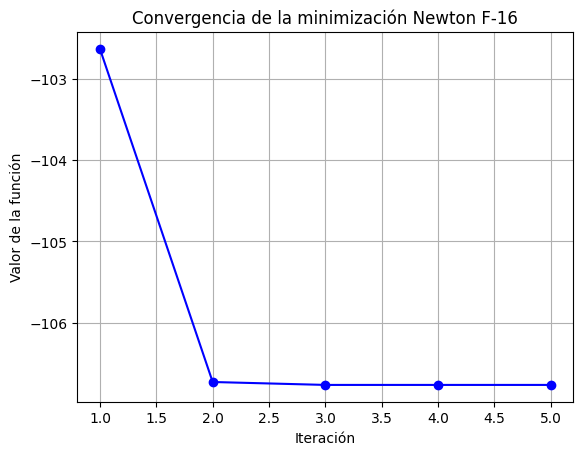

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -106.7645367492647
        x: [-1.582e+00 -3.130e+00]
      nit: 9
      jac: [-8.296e-08  3.260e-07]
 hess_inv: [[ 3.643e-03  1.442e-05]
            [ 1.442e-05  3.685e-03]]
     nfev: 11
     njev: 11


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_minimize.py:576: RuntimeWarning: Method BFGS cannot handle constraints.
  warn('Method %s cannot handle constraints.' % method,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_minimize.py:580: RuntimeWarning: Method BFGS cannot handle bounds.
  warn('Method %s cannot handle bounds.' % method,


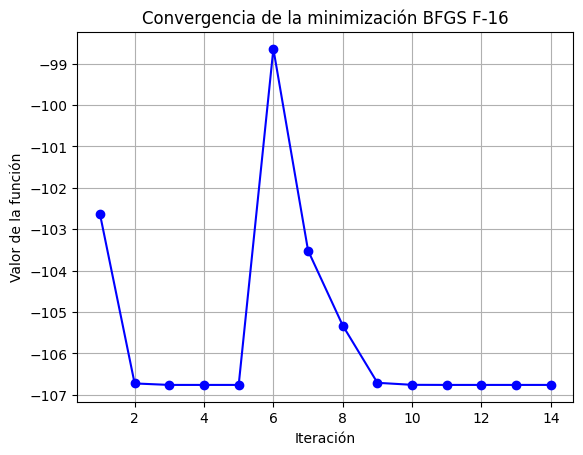

In [26]:

si='BFGS'
NC='Newton'
TC='Confidence-Land'
CG='Max-Descense'
F_11='F-11'
F_16='F-16'


def Callback_16(intermediate_result):
    result_16.append(intermediate_result['fun'])

#La primera es la optima, la segunda es de comparacion
newton_16=optimization_Newton(Mapped_f_16,x0_16,Mapped_diff_x1_16,Mapped_diff_x2_16,constraints_16,Callback_16)
print(newton_16)
Print_plot(result_16,NC,F_16)

Quasi_16=optimization_QuasiNewton(Mapped_f_16,x0_16,Mapped_diff_x1_16,Mapped_diff_x2_16,constraints_16,Callback_16)
print(Quasi_16)
Print_plot(result_16,si,F_16)

**Análisis de la salida:**

En las figuras se muestra la convergencia de la minimización de las funciones usando los métodos antes explicados, se puede notar que en la segunda(usando BFGS) la convergencia después de entrar en un estado de meseta sube de nuevo, este ascenso en los valores de la función se debe a problemas de condicionamiento de la matriz o a errores numéricos o cancelaciones catastróficas, realmente cuando entra en un estado así ya se podría detener, pues está lo suficientemente cerca del óptimo como para que sea válido.

success: Es un valor booleano que indica si la optimización fue exitosa (True) o no (False). Aquí, True significa que se encontró una solución satisfactoria.

status: Es un código que indica si la optimización fue exitosa (0) o si hubo algún problema. Un valor de 0 significa que todo salió bien.

fun: Es el valor mínimo de la función encontrado por el algoritmo. En este caso -106.76453674926469, que es bastante cercano al valor dado(-106.764537).

x: Es el array que contiene los valores de las variables en el punto óptimo. En este caso, [-1.582e+00 -3.130e+00] son los valores de las variables que minimizan la función objetivo.

nit: Número de iteraciones realizadas por el algoritmo de optimización. En este caso 9(Notar que fueron menos con Newton que con BFGS).

jac: Es el vector Jacobiano (o gradiente) de la función objetivo en el punto óptimo: [ 1.763e-05  4.168e-05] muestra los valores del gradiente en la solución óptima.

njev: Número de evaluaciones del Jacobiano. En este caso fueron 14.

nfev: Número de evaluaciones a la función. En este caso 9.

nhev: Número de evaluciones del Hessiano: No fue evaluado(0)




**Código para ejecutar F_11(Ejercicio 11):**



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_trustregion_constr/projections.py:181: UserWarning: Singular Jacobian matrix. Using SVD decomposition to perform the factorizations.
  warn('Singular Jacobian matrix. Using SVD decomposition to ' +


           message: `xtol` termination condition is satisfied.
           success: True
            status: 2
               fun: 14027415755.321705
                 x: [ 1.000e+01  1.000e+01]
               nit: 306
              nfev: 257
              njev: 257
              nhev: 0
          cg_niter: 310
      cg_stop_cond: 2
              grad: [-5.471e+01  2.735e+02]
   lagrangian_grad: [ 0.000e+00  0.000e+00]
            constr: [array([-1.000e+01]), array([-1.000e+01]), array([-1.000e+01]), array([-1.000e+01])]
               jac: [array([[-1.000e+00,  0.000e+00]]), array([[ 0.000e+00, -1.000e+00]]), array([[ 1.000e+00,  0.000e+00]]), array([[ 0.000e+00,  1.000e+00]])]
       constr_nfev: [771, 771, 771, 771]
       constr_njev: [0, 0, 0, 0]
       constr_nhev: [0, 0, 0, 0]
                 v: [array([-5.032e+01]), array([-1.401e+08]), array([ 4.389e+00]), array([-1.401e+08])]
            method: tr_interior_point
        optimality: 0.0
  constr_violation: 10.000000098108039


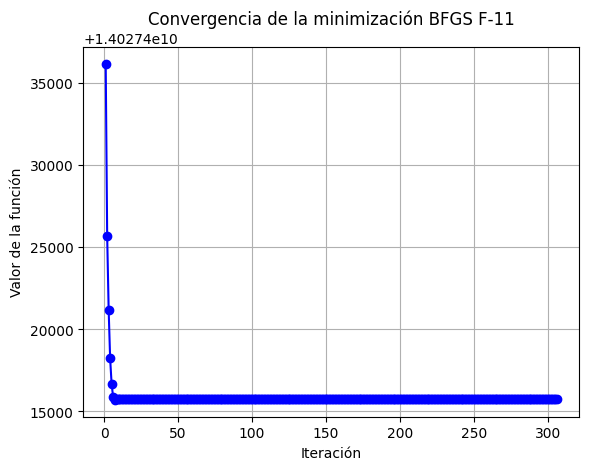

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 2.674462911674211
       x: [ 9.236e+00 -1.000e+01]
     nit: 5
     jac: [ 1.302e-01 -3.234e-02]
    nfev: 19
    njev: 28
    nhev: 0


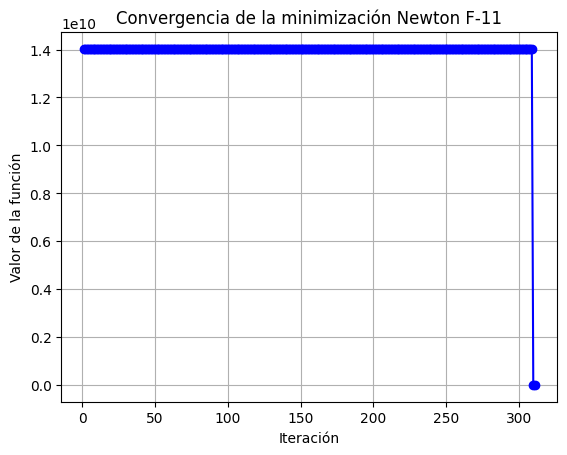

In [27]:
def Callback_11(intermediate_result):
    result_11.append(intermediate_result['fun'])

#La primera es la optima, la segunda es de comparacion
Quasi_11=optimization_ConfidenceLand(Mapped_f11,x0_11,Mapped_f11_diff_x1,Mapped_f11_diff_x2,constraints_11,Callback_11)
print(Quasi_11)
result_Evaluate=Mapped_f11(x0_11)
print(result_Evaluate)
Print_plot(result_11,si,F_11)

Newton_11=optimization_Newton(Mapped_f11,x0_11,Mapped_f11_diff_x1,Mapped_f11_diff_x2,constraints_11,Callback_11)
print(Newton_11)
Print_plot(result_11,NC,F_11)

**Análisis de la salida:**

En las figuras se muestra la convergencia de la minimización de las funciones usando los métodos antes explicados, en esta ocasión se usó el método de Región de Confianza que respeta las restricciones pero da una mala evaluación de la función, se puede notar que en la segunda(usando Newton esta vez) la convergencia después de entrar en un estado de meseta sube de nuevo, esto se debe a errores numéricos o cancelaciones catastróficas, realmente cuando entra en un estado así ya se podría detener, pues está lo suficientemente cerca del óptimo como para que sea válido.

success: Es un valor booleano que indica si la optimización fue exitosa (True) o no (False). Aquí, el resultado es False porque en 0 hay una asíntota y esta nunca será alcanzada por la función, por lo que solo puede tender a 0, nunca alcanzarlo.

status: Es un código que indica si la optimización fue exitosa (0) o si hubo algún problema. Un valor de 2 significa que no convergió al valor deseado, pero el motivo es el que se explicó anteriormente.

fun: Es el valor mínimo de la función encontrado por el algoritmo. En este caso 14027415755.321705, que es bastante cercano al valor dado(0).

x: Es el array que contiene los valores de las variables en el punto óptimo. En este caso, [1.000e+01 1.000e+01] son los valores de las variables que minimizan la función objetivo.

nit: Número de iteraciones realizadas por el algoritmo de optimización. En este caso 306.

cg_niter: Número de iteraciones que realiza el solucionador de CG durante el algoritmo. En este caso 310.

cg_stop_cond: Indica si el solucionador de CG convergió (2) o no (1). En este caso 2.

grad: Es el vector gradiente de la función objetivo en el punto óptimo. En este caso [-5.471e+01 2.735e+02].

lagrangian_grad: Es el vector gradiente de la función objetivo en el punto óptimo. En este caso [0.000e+00 0.000e+00].

constr: Es el vector de restricciones en el punto óptimo. En este caso es un array de 4 elementos, cada uno con un array de 1 elemento: [array([-1.000e+01]), array([-1.000e+01]), array([-1.000e+01]), array([-1.000e+01])]

jac: Es la matriz Jacobiana de las restricciones en el punto óptimo: [array([[-1.000e+00,  0.000e+00]]), array([[ 0.000e+00, -1.000e+00]]), array([[ 1.000e+00,  0.000e+00]]), array([[ 0.000e+00,  1.000e+00]])].

constr_nfev: El número de evaluaciones de las restricciones durante el algoritmo, en este caso 771.

constr_njev: Es el número de evaluaciones del gradiente de las restricciones durante el algoritmo, en este caso 0.

constr_nhev: Es el número de evaluaciones del hessiano de las restricciones durante el algoritmo, en este caso 0.

v: Vector auxiliar que se usa durante el algoritmo.

method: Es el método que se utlizó para resolver en el problema, en este caso fue tr_interior_point, que lo que hace es construir una secuencia de puntos interiores que convergen hacia el punto óptimo. El método comienza con un punto inicial arbitrario y, en cada iteración construye un nuevo punto interior que se encuentra más cerca del punto óptimo, el nuevo punto se construye mediante la solución de un problema de optimización de subconjuntos.

optimality: La salida de optimality es un número que indica la optimalidad del punto final encontrado por el algorimo. Un valor de 0 indica que el punto final es óptimo.

constr_violation: Indica la violación de las restricciones en el punto final, en este caso 10.000000098108039

execution_time: Tiempo de ejecución del algortimo

tr_radius: El valor de este parámetro se utiliza para controlar la velocidad de convergencia del método tr_interior_point

constr_penalty: La penalización de las restricciones es usado para controlar la cantidad de penalización a aplicar a las restricciones del problema. Un valor más alto de constr_penalty resultará en una penalización más agresiva, lo que puede llevar a una convergencia más rápidad del algoritmo de optimización. Sin embargo, un valor muy alto puede hacer que el algoritmo quede atrapado en un mínimo local.

barrier_parameter: Se utiliza para controlar la cantidad de barrera utilizada en el problema de optimización. Ocurre lo mismo si es alto o bajo que en el parámetro anterior.

barrier_tolerance: Se utiliza para controlar la tolerancia de la barrera. Si la barrera es demasiado alta, el algoritmo puede no converger. Si la barrera es demasiado baja, el algoritmo puede converger demasiado lentamente.

niter: Número de iteraciones del algoritmo


**Código para ejecutar la función F_74(Ejercicio 74):**

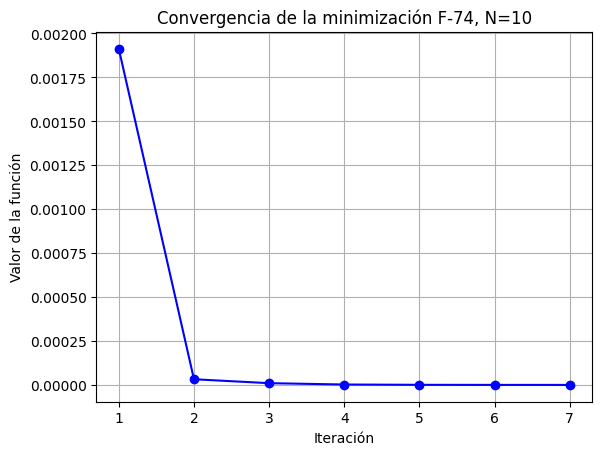

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 3.72138205616265e-08
       x: [ 1.543e+00  1.543e+00  1.543e+00  1.543e+00  1.543e+00
            1.543e+00  1.543e+00  1.543e+00  1.000e+00]
     nit: 7
     jac: [-2.718e-07 -2.718e-07 -2.718e-07 -2.718e-07 -2.718e-07
           -2.718e-07 -2.718e-07 -2.718e-07  0.000e+00]
    nfev: 340
    njev: 34


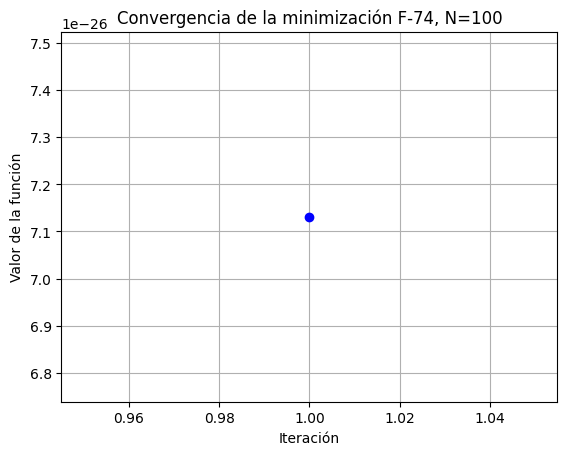

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 7.130746994176412e-26
       x: [ 1.102e+00  1.102e+00 ...  1.102e+00  1.000e+00]
     nit: 1
     jac: [-5.158e-25 -5.158e-25 ... -5.158e-25  0.000e+00]
    nfev: 200
    njev: 2


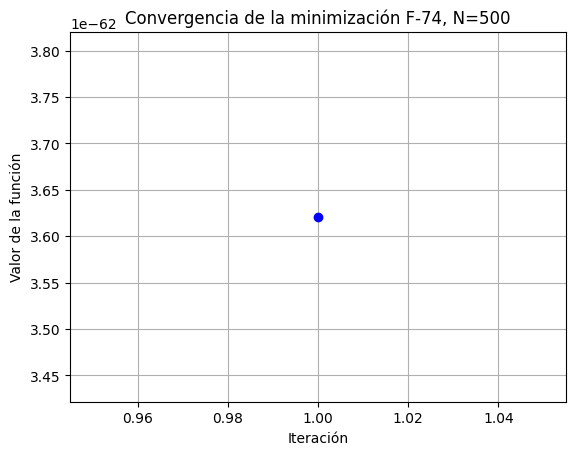

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 3.6207259360197988e-62
       x: [ 1.045e+00  1.045e+00 ...  1.045e+00  1.000e+00]
     nit: 1
     jac: [-2.486e-61 -2.486e-61 ... -2.486e-61  0.000e+00]
    nfev: 1000
    njev: 2


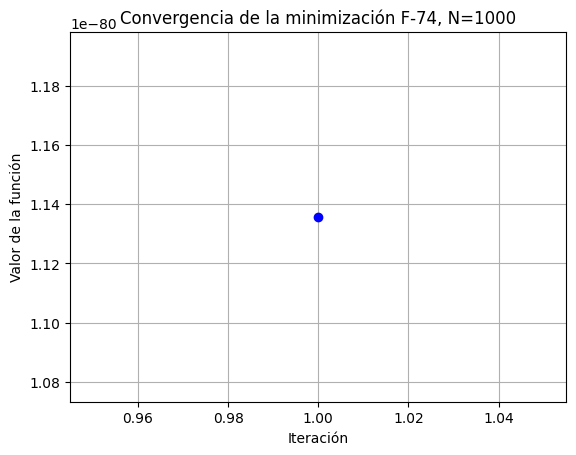

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 1.1357134141278424e-80
       x: [ 1.032e+00  1.032e+00 ...  1.032e+00  1.000e+00]
     nit: 1
     jac: [-6.918e-80 -6.918e-80 ... -6.918e-80  0.000e+00]
    nfev: 2000
    njev: 2


In [28]:
for i in N:
    x0=[]
    F_74=lambda x:(1+1500-Suma(x))**(i-Suma(x))
    result_74=[]

    Create_values(i,1.0)

    def Callback(intermediate_result):
        result_74.append(intermediate_result['fun'])

    result=minimize(F_74, x0, method='cg',tol=1e-6,callback=Callback)
    iterations=range(1,len(result_74)+1)
    plt.plot(iterations,result_74, marker='o', linestyle='-', color='b')
    plt.xlabel('Iteración')
    plt.ylabel('Valor de la función')
    plt.title('Convergencia de la minimización F-74, N='+str(i))
    plt.grid(True)
    plt.show()
    print(result)

**Análisis de la salida:(Se analiza la primera salida)**

En la figura se muestra la convergencia de la minimización de las funciones usando los métodos antes explicados, en este caso Máximo Descenso, el cual realiza menos iteraciones que BFGS. Este caso fue para N=10 y D=1500, el valor de D, no puede ser cercano al valor, debido a que pueden haber cancelaciones catástroficas, por ende escogimos un valor de D lo suficientemente grande como para que no afecte a los tres casos de N que vamos a probar. Esta función con valores cada vez más grandes que N(dimensión) el valor de la función va disminuyendo cada vez más

success: Es un valor booleano que indica si la optimización fue exitosa (True) o no (False). Aquí, True significa que se encontró una solución satisfactoria.

status: Es un código que indica si la optimización fue exitosa (0) o si hubo algún problema. Un valor de 0 significa que todo salió bien.


fun: Es el valor mínimo de la función encontrado por el algoritmo. En este caso 3.72138205616265e-08, que no probablemente sea un mínimo local de la función, se hace difícil buscar con mayor precisión por la dependencia que tiene la búsqueda con el valor D. Además a medida que aumenta la dimensionalidad, el espacio de búsqueda se vuelve más disperso y la exploración exhaustiva se vuelve más difícil.

x: Es el array que contiene los valores de las variables en el punto óptimo. En este caso, [ 1.543e+00  1.543e+00  1.543e+00  1.543e+00  1.543e+00 1.543e+00  1.543e+00  1.543e+00  1.000e+00] son los valores de las variables que minimizan la función objetivo.

nit: Número de iteraciones realizadas por el algoritmo de optimización. En este caso 7.

jac: Es el vector Jacobiano (o gradiente) de la función objetivo en el punto óptimo: [-2.718e-07 -2.718e-07 -2.718e-07 -2.718e-07 -2.718e-07 -2.718e-07 -2.718e-07 -2.718e-07  0.000e+00] muestra los valores del gradiente en la solución óptima.

njev: Número de evaluaciones del Jacobiano. En este caso fueron 34.

nfev: Número de evaluaciones a la función. En este caso 340.


NOTA: Para N=100, N=500, N=1000, se realiza una sola iteración porque llega a un criterio de parada converge rápidamente  